In [19]:
import pandas as pd

In [20]:
df_corona=pd.read_csv('2019_nCoV_data.csv')
df_corona2=pd.read_csv('covid_19_data.csv')

In [36]:
df_corona['Country'].unique().size

34

In [22]:
df_country=df_corona.groupby('Country').sum()
df_country.reset_index(inplace=True)


In [23]:
df_country.head()

,Country,Sno,Confirmed,Deaths,Recovered
0,Australia,80718,284.0,0.0,70.0
1,Belgium,17149,14.0,0.0,1.0
2,Brazil,83,0.0,0.0,0.0
3,Cambodia,20871,22.0,0.0,6.0
4,Canada,59273,116.0,0.0,6.0


In [24]:
df_country['In Progress']=df_country['Confirmed']-(df_country['Deaths']+df_country['Recovered'])
df_country['Death Ratio']=round((df_country['Deaths']/df_country['Confirmed'])*100,2)
df_country['Recovered Ratio']=round((df_country['Recovered']/df_country['Confirmed'])*100,2)
df_country['Pending Cases']=round((df_country['In Progress']/df_country['Confirmed'])*100,2)
df_country.fillna(0)

,Country,Sno,Confirmed,Deaths,Recovered,In Progress,Death Ratio,Recovered Ratio,Pending Cases
0,Australia,80718,284.0,0.0,70.0,214.0,0.00,24.65,75.35
1,Belgium,17149,14.0,0.0,1.0,13.0,0.00,7.14,92.86
2,Brazil,83,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,Cambodia,20871,22.0,0.0,6.0,16.0,0.00,27.27,72.73
4,Canada,59273,116.0,0.0,6.0,110.0,0.00,5.17,94.83
5,China,598,549.0,0.0,0.0,549.0,0.00,0.00,100.00
6,Egypt,6378,4.0,0.0,0.0,4.0,0.00,0.00,100.00
7,Finland,20353,20.0,0.0,7.0,13.0,0.00,35.00,65.00
8,France,21044,186.0,3.0,18.0,165.0,1.61,9.68,88.71
9,Germany,20542,252.0,0.0,5.0,247.0,0.00,1.98,98.02


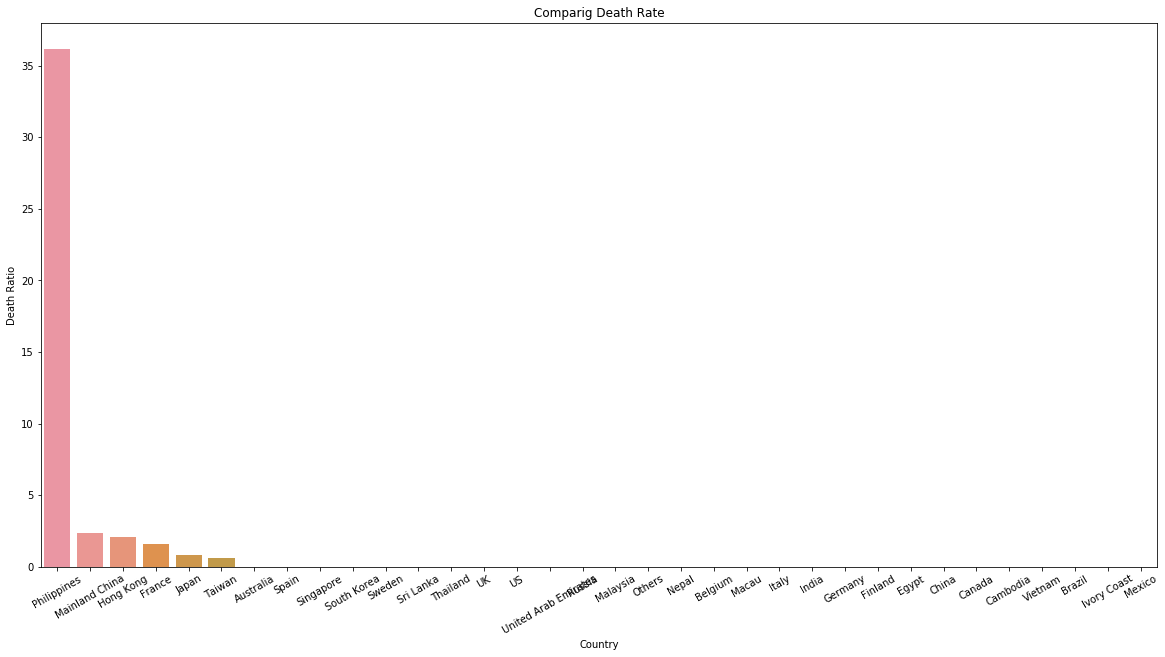

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
dim=(20,10)
fig, ax = plt.subplots(figsize=dim)
df_country=df_country.sort_values('Death Ratio',ascending=False)
ax=sns.barplot(x='Country',y='Death Ratio',data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Death Rate")
plt.show()

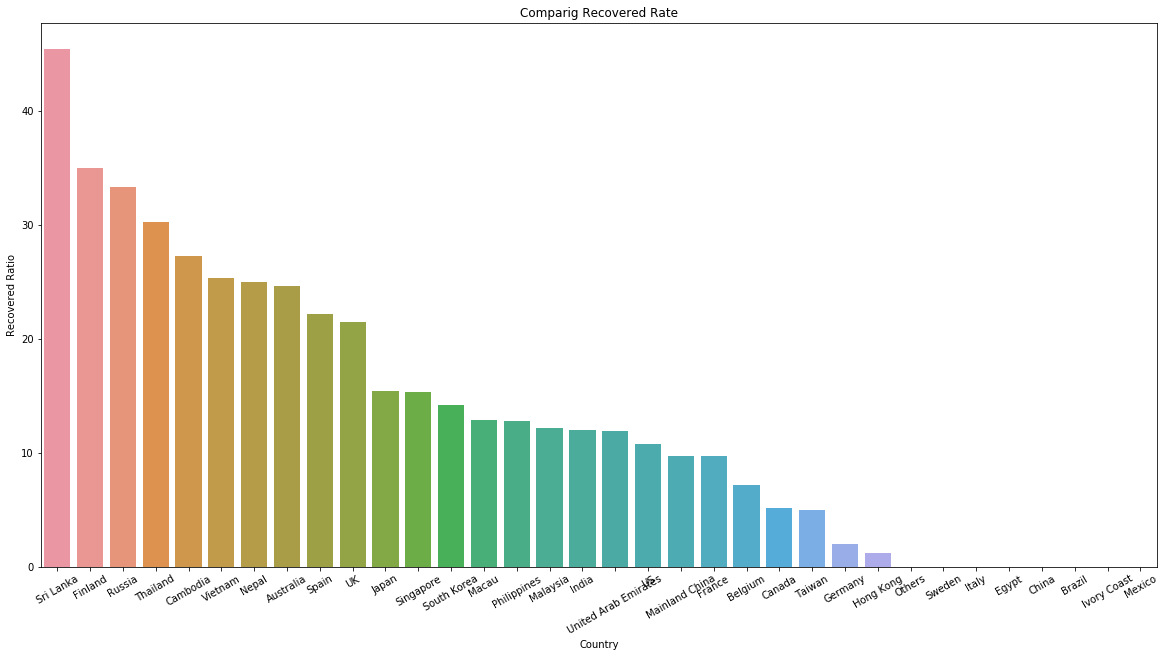

In [26]:
fig, ax = plt.subplots(figsize=dim)
df_country=df_country.sort_values('Recovered Ratio',ascending=False)
ax=sns.barplot(x='Country',y='Recovered Ratio',data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Recovered Rate")
plt.show()

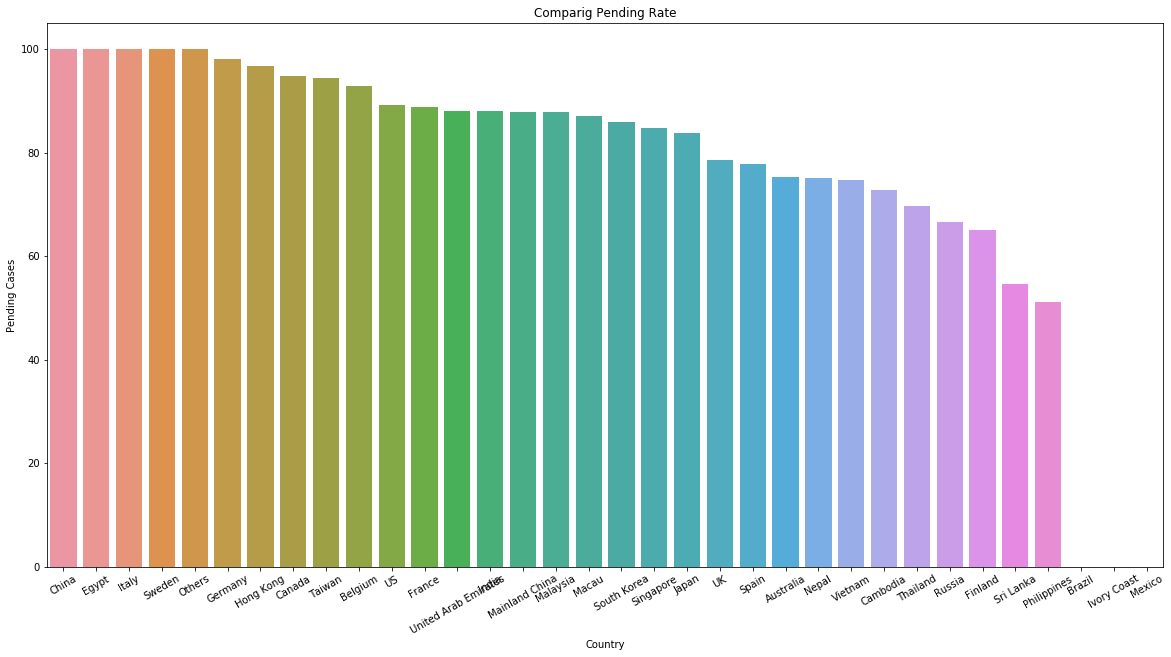

In [27]:
fig, ax = plt.subplots(figsize=dim)
df_country=df_country.sort_values('Pending Cases',ascending=False)
ax=sns.barplot(x='Country',y='Pending Cases',data=df_country)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Pending Rate")
plt.show()

Now Analysing Based on Time

In [28]:
df_time=df_corona.groupby("Date")['Confirmed', 'Deaths', 'Recovered'].sum()
df_time = df_time.sort_values('Date', ascending=False)
df_time.reset_index(inplace=True)
df_time['Date'] = pd.to_datetime(df_time['Date'])
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
Date         27 non-null datetime64[ns]
Confirmed    27 non-null float64
Deaths       27 non-null float64
Recovered    27 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 944.0 bytes


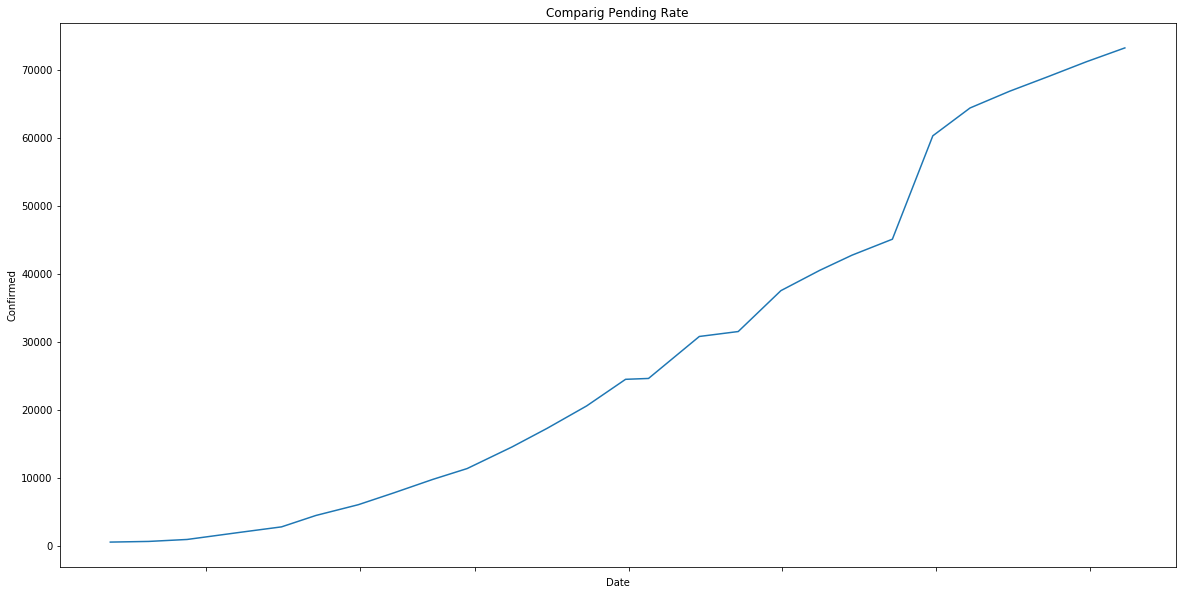

In [29]:
fig, ax = plt.subplots(figsize=dim)
# df_time=df_country.sort_values('Pending Cases',ascending=False)
ax=sns.lineplot(x='Date',y='Confirmed',data=df_time)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Comparig Pending Rate")
plt.show()

In [30]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# dim=(20,20)
# fig, ax = plt.subplots(3,1,figsize=dim)
# df_country=df_country.sort_values('Death Ratio',ascending=False)
# register_matplotlib_converters()
# ax[0]=sns.barplot(x='Country',y='Death Ratio',data=df_country)
# ax[1]=sns.barplot(x='Country',y='Death Ratio',data=df_country)
# ax[2]=sns.barplot(x='Country',y='Death Ratio',data=df_country)
# ax.set_xticklabels(xlabels,rotation=30)
# plt.show()

In [31]:
Pending

NameError: name 'Pending' is not defined

In [ ]:
df_latest2=df_corona2.groupby("Last Update")['Confirmed', 'Deaths', 'Recovered'].sum()

In [ ]:
df_latest2.sum()

In [ ]:
df_a.sum()

In [ ]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()
temp = temp.sort_values('Date', ascending=False)
temp.head(1).style.background_gradient(cmap='Pastel1')

In [ ]:
df_corona[df_corona['Country']=='US']['Deaths'].sum()

In [ ]:
df[df['Item_Description'] == 'SWEET ONIONS']['TotalPrice'].sum()

In [ ]:
df=df_corona.groupby(['Country']).count()

In [ ]:
df.head(100)

In [ ]:
import seaborn as sns

In [ ]:
sn=sns.barplot(df['Country'],df['Confirmed'])
sn.set_size_inches(11.7, 8.27)

In [ ]:
df=df_corona.groupby(['']).count()

In [ ]:
df.head(5)

In [ ]:
fig = px.choropleth(full_latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,2000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# ------------------------------------------------------------------------

fig = px.choropleth(full_latest_grouped[full_latest_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [41]:
import json
import plotly.express as px
fig = px.choropleth(df_country, geojson=df_country, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'})

TypeError: choropleth() got an unexpected keyword argument 'geojson'

In [45]:

import plotly.express as px
import folium



In [46]:
df_country.head()

,Country,Sno,Confirmed,Deaths,Recovered,In Progress,Death Ratio,Recovered Ratio,Pending Cases
5,China,598,549.0,0.0,0.0,549.0,0.0,0.0,100.0
6,Egypt,6378,4.0,0.0,0.0,4.0,0.0,0.0,100.0
12,Italy,19787,49.0,0.0,0.0,49.0,0.0,0.0,100.0
27,Sweden,19631,18.0,0.0,0.0,18.0,0.0,0.0,100.0
20,Others,14242,2161.0,0.0,0.0,2161.0,0.0,0.0,100.0


In [44]:
# World wide

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(df_country)):
    folium.Circle(
        location=[df_country.iloc[i]['Lat'], df_country.iloc[i]['Long']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(df_country.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(df_country.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(df_country.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(df_country.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(df_country.iloc[i]['Recovered']),
        radius=int(df_country.iloc[i]['Confirmed'])).add_to(m)
m

KeyError: 'Lat'